# AST326 lab01
### Maxwell Fine 1004714400

### Q3: 
The three body problem. Now lets add another
planet to our system. We will consider Earth as the small planet and
Jupiter as the large planet. The orbit of Earth will be determined
6
by the gravitational force of the Sun at the centre of the solar system
and the gravitational force of Jupiter at an orbital radius of 5.2 AU.
We will assume that Jupiter and the Sun are not affected by Earth’s
gravitational force.



### pseudo code

### import function to calculate F_g accerlation from q1.py

### import orbit plotting function from q1.py

### new integration function
* calculates orbit for jupiter first
* uses position of jupiter, and sun to calculate accerlation componets for earth
* calculate earth postions

### if name == main
### runs program, and repeats with the different set of inital conditons


In [70]:
# imputs
from q1 import gr_2b_g_acc # computes accerlation due to Fg
from q1 import fg_solver as fg_2b_solver # computes orbital mechanics for 2B problem
import numpy as np
import matplotlib.pyplot as plt

def fg_3b_solver(earth_i, jupiter_dyn, M_j, dt=0.0001, int_time=1., alpha=0):
    '''Numerically solves the 3 body problem using the GR correction
    for Newtonion gravity, alpha=0 corresponds to Newton
    Uses the The “Euler-Cromer” method. x=y=0 is the location of the sun. 

     Args:
     
     earth_i: list, float (in AU, and AU/yr)
              4 floats corrisponding to inital conidctions for earth
              IE earth_i = [x, y, vx, vy]
              
     jupiter_dyn: list
                  list of jupiters orbital dynamics
                  IE jupiter_dyn = [x_arr, y_arr, vx_arr, vy_arr]

    **Args:
    dt: float, Earth in years
              dt to use for numerical solution, default is 0.0001

    int_time: float, in Earth years
              integration time for solution, IE how long to solve for

    alpha: float, in AU^2
           value of alpha to use in correction for GR, defAUlt is 0


    Returns:
    x_arr, y_arr, vx_arr, vy_arr

    i_arr: array-like, float
           array of the ith direction of Earth

    vi_arr: array-like, float
            array of the ith direction's velocity of Earth

    '''

    # initalize values
    n_steps = int(int_time/dt) # how many dts between 0 and end
    x_arr = np.empty((n_steps),dtype=float)
    y_arr = np.empty((n_steps),dtype=float)
    vx_arr = np.empty((n_steps),dtype=float)
    vy_arr = np.empty((n_steps),dtype=float)
    
    # earth to jupiter distance
    # important! this is jupiter centric coord
    r_ejx = np.empty((n_steps),dtype=float)
    r_ejy = np.empty((n_steps),dtype=float) 
    
    # 3 sets of accerlation, one from jupiter and one from the sun, and net
    ax_acc_sun = np.empty((n_steps),dtype=float)
    ay_acc_sun = np.empty((n_steps),dtype=float)
    
    ax_acc_j = np.empty((n_steps),dtype=float)
    ay_acc_j = np.empty((n_steps),dtype=float)
    
    ax_acc_net = np.empty((n_steps),dtype=float)
    ay_acc_net = np.empty((n_steps),dtype=float)
    
    # read in jupiter dynamics, and earth intial conditons
    Jx_arr, Jy_arr, Jvx_arr, Jvy_arr = jupiter_dyn
    xi, yi, vxi, vyi = earth_i
    
    # apply inital conditions
    dt = dt
    x_arr[0] = xi # AU
    y_arr[0] = yi # AU
    vx_arr[0] = vxi # AU/ Year
    vy_arr[0] = vyi # AU/ Year
    
    # calculate inital r_ej
    

    # numeric integration
    for i in range(1, n_steps):

        # Calculate acceleration from sun
        ax_acc_sun[i], ay_acc_sun[i] = gr_2b_g_acc(x_arr[i-1], y_arr[i-1],
                                           alpha=alpha, m_sun=1)
        
        # Calculate acceleration from jupiter
        # calculate r_ej
        # this is acceleration towards jupiter
        r = np.sqrt(x_arr[i-1]**2 + y_arr[i-1]**2)
        rejx = Jx_arr[i-1] - x_arr[i-1]
        rejy = Jy_arr[i-1] - y_arr[i-1]
        
        ax_acc_j[i], ay_acc_j[i] = gr_2b_g_acc(rejx, rejy,
                                           alpha=0, m_sun=M_j)
        
        # convert back into sun centric coordinats 
        # vector coords should put 'toward' jupiter
        if Jx_arr[i-1] > x_arr[i-1]: 
            ax_acc_j[i] = np.abs(ax_acc_j[i])
        else:
            ax_acc_j[i] = -1* np.abs(ax_acc_j[i])
        
        
        if Jy_arr[i-1] > y_arr[i-1]: 
            ay_acc_j[i] = np.abs(ay_acc_j[i])
        else:
            ay_acc_j[i] = -1* np.abs(ay_acc_j[i])
            
        # Calculate net acc
        ax_acc_net[i] = ax_acc_sun[i] + ax_acc_j[i]
        ay_acc_net[i] = ay_acc_sun[i] + ay_acc_j[i]

        # Calculate velocity
        vx_arr[i] = vx_arr[i-1] + dt*ax_acc_net[i]
        vy_arr[i] = vy_arr[i-1] + dt*ay_acc_net[i]
        # Calculate position
        x_arr[i] = x_arr[i-1] + dt*vx_arr[i]
        y_arr[i] = y_arr[i-1] + dt*vy_arr[i]

    return x_arr, y_arr, vx_arr, vy_arr


In [138]:
dt = 0.0001 # Earth years
int_time = 3.6 # Earth years
M_j =  1e-3 #solar masses
# inital conidtions for jupiter
xJi = 5.2 # AU
yJi = 0.0 # AU
vxJi = 0.0 # AU/yr
vyJi = 2.63 # AU/yr

# inital conditions for Earth
xEi = 1.0 # AU
yEi = 0.0 # AU
vExi = 0.0 # AU
vEyi = 6.18 # AU/yr

jupiter_dyn = fg_2b_solver(xJi, yJi, vxJi, vyJi, dt=dt, int_time=int_time, alpha=0)
earth_i = [xEi, yEi, vExi, vEyi,]

earth_dyn = fg_3b_solver(earth_i, jupiter_dyn, 1000*M_j, 
                         dt=0.0001, int_time=int_time, alpha=0)

In [139]:
e_x, e_y, e_vx, e_vy = earth_dyn
Jx_arr, Jy_arr, Jvx_arr, Jvy_arr = jupiter_dyn

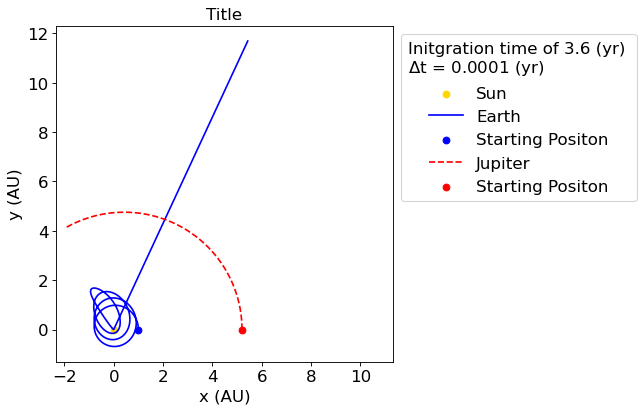

In [140]:
x_arrs = [e_x, Jx_arr]
y_arrs = [e_y, Jy_arr]

labels = ['Earth', 'Jupiter']
colors = ['blue', 'red']
color_int = colors
line_styles = ['-', '--']
title='Title'

plot_orbits(x_arrs, y_arrs, labels, colors, color_int, line_styles, title,
                int_time, dt, save_name='youforgottoset_save_name.pdf',
                plot_sun=True, label_fs=15,legend_fs=15)

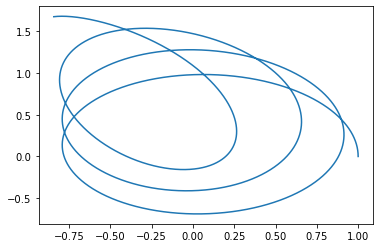

In [106]:
plt.plot(e_x, e_y)


(-1.1452191865442216,
 5.502153294597344,
 -0.9607514170187053,
 5.6866210641228605)

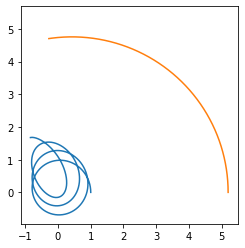

In [107]:
plt.plot(e_x, e_y)
plt.plot(Jx_arr, Jy_arr)
plt.axis('square')

In [112]:
def plot_orbits(x_arrs, y_arrs, labels, colors, color_int, line_styles, title,
                int_time, dt, save_name='youforgottoset_save_name.pdf',
                plot_sun=True, label_fs=15,legend_fs=15):
    '''Plots orbits of n planet orbits (with the same inital conditions),
       optionally plots the sun. Uses matplotlib.pyplot. Saves output.

       Args:
       x_arrs: list of arrays (arrays in AU)
               list of x_arr values corresponding to x componet of orbit

       y_arrs: list of arrays (arrays in AU)
               list of y_arr values corresponding to x componet of orbit

       labels: list of strings
               list containing the label for the plot legend corresponding to
               the same index orbit

      colors: list of strings
              list containing the color (str) for the plot corresponding to
              the same index orbit

      color_int: str
                 what color to plot the starting positon

      line_styles: list of strings
                   list containing the linestyle for the plot corresponding to
                   the same index orbit

      title: str
             title of plot

      int_time: float, in Earth years
                integration time for solution, IE how long the plot is for


      dt: float, Earth in years
                dt to use for plotting, default is 0.0001

      **KArgs:
      save_name: str
                 argument for plt.savefig()
                 default is 'youforgottoset_save_name.pdf

      plot_sun: bool
                if True, plots the sun at the center of the figure

      label_fs: int
                fontsize to use for plot (exluding legend), default is 15

      legend_fs: int
                 fontsize to use for legend, default is 15

     Returns:
     None, plot is saved in the same dir as where the program is stored

     '''
    # initalize figure
    plt.figure(figsize=(8, 8), dpi=80)

    # plot sun
    if plot_sun == True:
        plt.scatter(0,0,marker ='o',color ='gold',label = 'Sun')

    # plot planets
    for i in range(len(x_arrs)):
        # get info for the ith planet
        x_arr = x_arrs[i]
        y_arr = y_arrs[i]
        label = labels[i]
        color = colors[i]
        linestyle = line_styles[i]

        # plot orbits
        plt.plot(x_arr, y_arr, color=color, label=label, linestyle=linestyle)

        # plot inital condition
        plt.scatter(x_arr[0], y_arr[0], color=color_int[i], label="Starting Positon")

    # adjust plot parameters and add labels
    plt.xlabel("x (AU)", fontsize=label_fs)
    plt.ylabel("y (AU)",fontsize=label_fs)
    plt.axis('square')
    plt.xticks(fontsize=label_fs)
    plt.yticks(fontsize=label_fs)
    plt.legend(title='Initgration time of ' + str(int_time)[0:3] + ' (yr)'
               +' \n$\Delta$t = ' + str(dt) + ' (yr)',fontsize=legend_fs,
               bbox_to_anchor=(1, 1), title_fontsize=legend_fs)
    plt.title(title, fontsize=label_fs)
    plt.tight_layout()
    plt.show()
    plt.savefig(save_name) # saves plot
    plt.close() # closes figure to keep memory use low

    return